In [875]:
#imports
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [876]:
#import dataset
dataset = read_csv('/home/shriya/Desktop/ml_assignment1/Pima_Indian_diabetes.csv')

In [877]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [878]:
#print no. of 0  values in dataset
dataset2 = dataset.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of 'zero' Values\n")
print((dataset2[:] == 0).sum())

# of Rows, # of Columns:  (768, 8)

Column Name           # of 'zero' Values

Pregnancies                 106
Glucose                       5
BloodPressure                32
SkinThickness               215
Insulin                     374
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [879]:
#For Pregnancies
#replacing NaN by median
dataset['Pregnancies'] = dataset['Pregnancies'].fillna(dataset['Pregnancies'].median())
#for negative values, replace by 0
dataset['Pregnancies'] = np.where(dataset['Pregnancies'] < 0, dataset['Pregnancies'].median(), dataset['Pregnancies'])

In [880]:
#For Glucose
#replace 0 values by median
dataset.loc[dataset['Glucose'] == 0, 'Glucose'] = dataset['Glucose'].median()
#replace null values by median
dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].median())

In [881]:
#For Blood Pressure
#replacing 0 value by median
dataset.loc[dataset['BloodPressure'] == 0, 'BloodPressure'] = dataset['BloodPressure'].median()
#replacing null by median
dataset['BloodPressure'] = dataset['BloodPressure'].fillna(dataset['BloodPressure'].median())
#for negative values, replace by median
dataset['BloodPressure'] = np.where(dataset['BloodPressure'] < 0, dataset['BloodPressure'].median(), dataset['BloodPressure'])

In [882]:
#for NaN value, replace by median
dataset = dataset.assign(
                        Insulin = lambda x: x.Insulin.where(x.Insulin.gt(0)),
                        SkinThickness = lambda x: x.SkinThickness.where(x.SkinThickness.gt(0))
                        )
# dataset['Insulin'].fillna(dataset['Insulin'].median(), inplace=True)
# dataset['SkinThickness'].fillna(dataset['SkinThickness'].median(), inplace=True)
s = dataset['SkinThickness'].value_counts(normalize=True)
# print(s)
missing = dataset['SkinThickness'].isnull()
dataset.loc[missing,'SkinThickness'] = np.random.choice(s.index, size=len(dataset[missing]),p=s.values)
s = dataset['Insulin'].value_counts(normalize=True)
# print(s)
missing = dataset['Insulin'].isnull()
dataset.loc[missing,'Insulin'] = np.random.choice(s.index, size=len(dataset[missing]),p=s.values)

In [883]:
#missing value imputation for BMI
#replacing 0 value by median
dataset.loc[dataset['BMI'] == 0, 'BMI'] = dataset['BMI'].median()

In [884]:
#replacing null by median
dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].median())

In [885]:
#for negative values, replace by median
dataset['BMI'] = np.where(dataset['BMI'] < 0, dataset['BMI'].median(), dataset['BMI'])

In [886]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,749.000000,768.000000
mean,3.868070,120.638679,72.176639,28.697091,152.274740,32.347473,0.471876,33.761336,0.348958
std,3.380499,30.528168,12.213688,10.526286,114.053185,7.035506,0.331329,12.297409,0.476951
min,0.000000,42.974768,15.372031,7.000000,14.000000,5.317899,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,75.000000,27.600000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,36.000000,185.750000,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [887]:
#imputation for Age
#replace nulls nd NaN
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [888]:

# dataset.describe()

In [889]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,92.0,33.600000,0.627,50.0,1
1,1.0,85.0,66.0,29.0,228.0,26.600000,0.351,31.0,0
2,8.0,183.0,64.0,30.0,88.0,23.300000,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,19.179925,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.100000,2.288,33.0,1


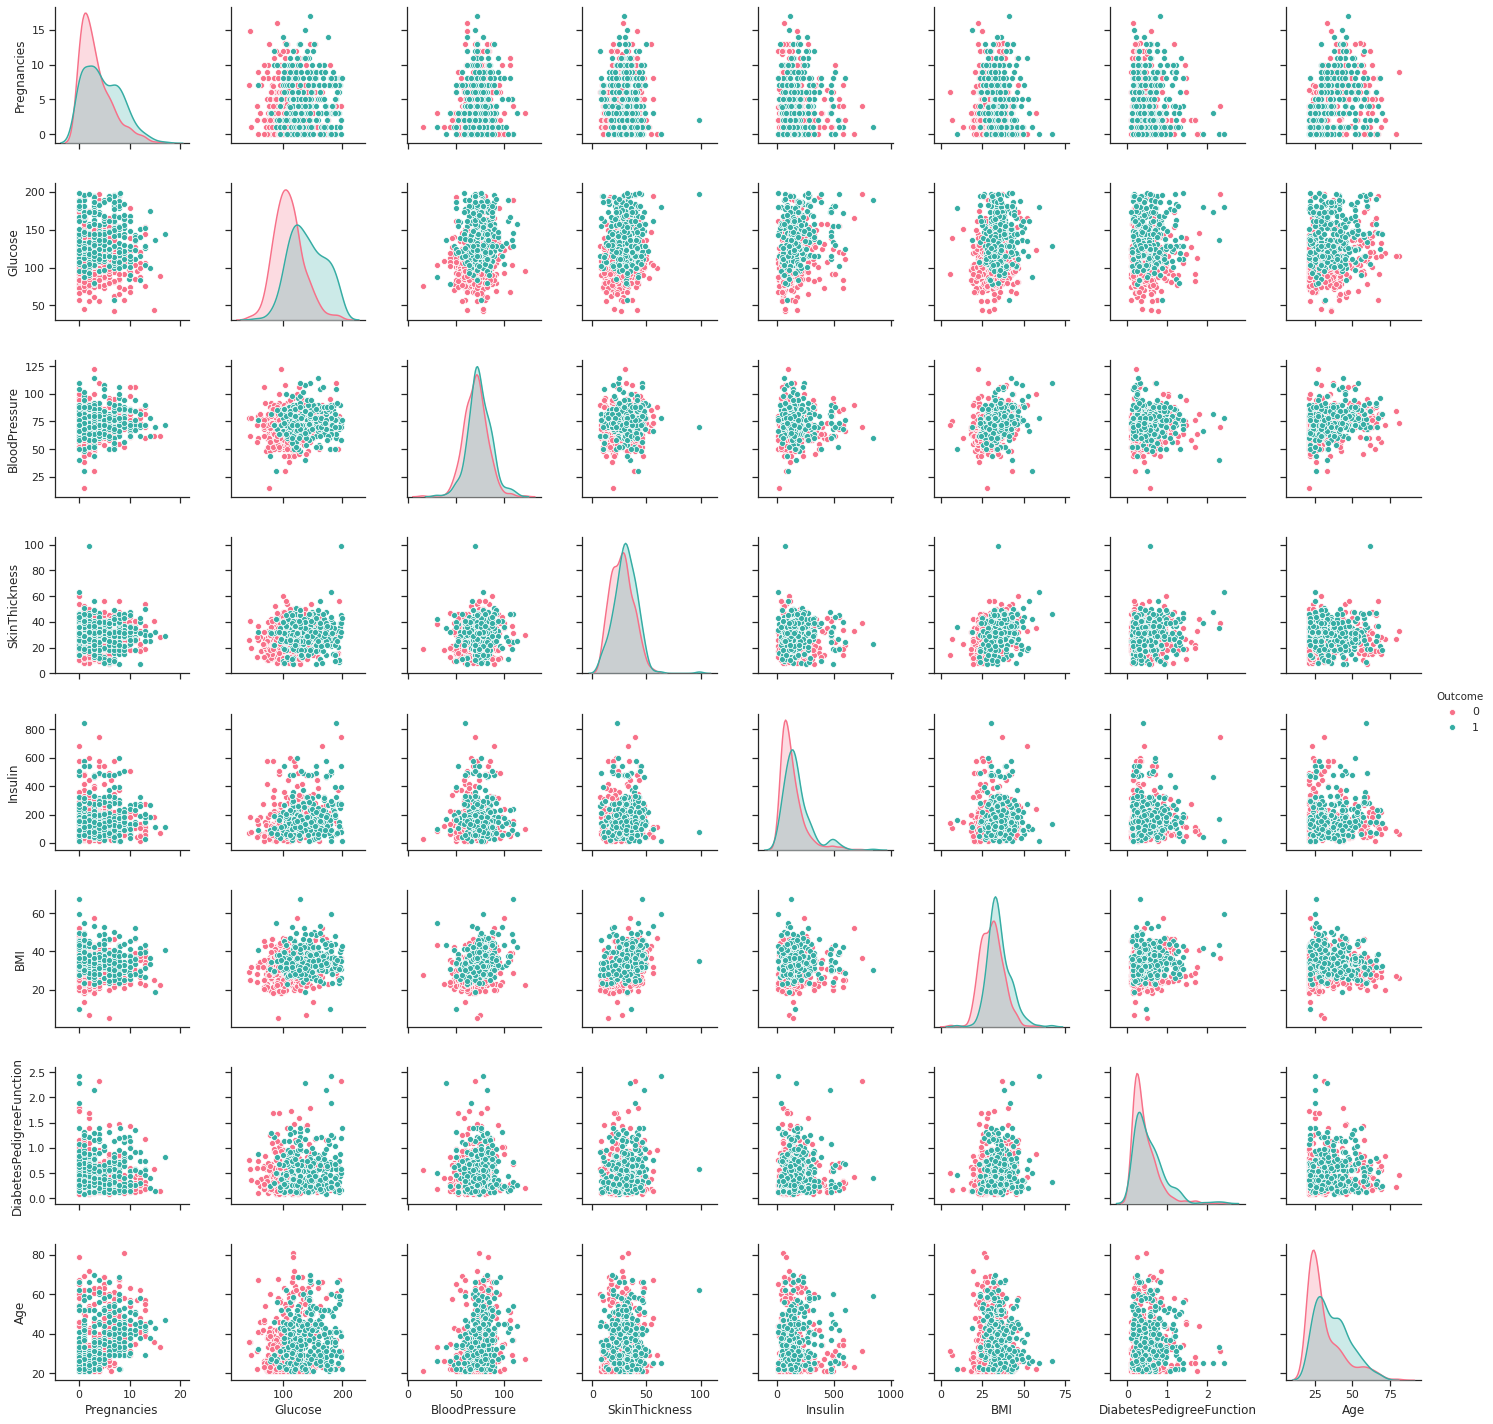

In [890]:
# plt.figure(figsize=(15,15))
# sns.set(style="ticks", color_codes=True)
# aa = sns.pairplot(dataset,hue = 'Outcome',markers=["o", "s"])
#sns.set_style("ticks")
sns.pairplot(dataset,vars = dataset.columns[:-1], hue ="Outcome",palette='husl')
plt.show()

In [891]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = dataset.columns
print(scaler.fit(dataset))

# print(scaler.data_max_)

dataset = scaler.transform(dataset)
dataset = pd.DataFrame(dataset, columns=cols)
dataset.describe()

MinMaxScaler(copy=True, feature_range=(0, 1))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.227534,0.497765,0.532736,0.235838,0.166196,0.437498,0.168179,0.210726,0.348958
std,0.198853,0.195662,0.114545,0.114416,0.137083,0.113876,0.141473,0.202778,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359078,0.456053,0.152174,0.073317,0.360656,0.070773,0.050000,0.000000
50%,0.176471,0.468035,0.531080,0.239130,0.133413,0.431874,0.125747,0.133333,0.000000
75%,0.352941,0.615447,0.606107,0.315217,0.206430,0.503497,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [892]:
#EDA
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.673130,0.531080,0.304348,0.093750,0.457772,0.234415,0.483333,1.0
1,0.058824,0.269349,0.474809,0.239130,0.257212,0.344470,0.116567,0.166667,0.0
2,0.470588,0.897452,0.456053,0.250000,0.088942,0.291057,0.253629,0.183333,1.0
3,0.058824,0.294986,0.474809,0.173913,0.096154,0.224370,0.038002,0.000000,0.0
4,0.000000,0.602628,0.230971,0.304348,0.185096,0.611538,0.943638,0.200000,1.0
5,0.294118,0.468035,0.549837,0.217391,0.103365,0.328284,0.052519,0.150000,0.0
6,0.176471,0.224484,0.267259,0.271739,0.088942,0.415688,0.072588,0.083333,1.0
7,0.588235,0.461626,0.531080,0.304348,0.231971,0.485288,0.023911,0.133333,0.0
8,0.117647,0.987182,0.512323,0.413043,0.635817,0.407595,0.034159,0.133333,1.0
9,0.470588,0.525718,0.756162,0.152174,0.259615,0.431874,0.065756,0.793939,1.0


In [893]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null float64
dtypes: float64(9)
memory usage: 54.1 KB


In [894]:
dataset.Outcome.unique()

array([1., 0.])

In [895]:
dataset.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

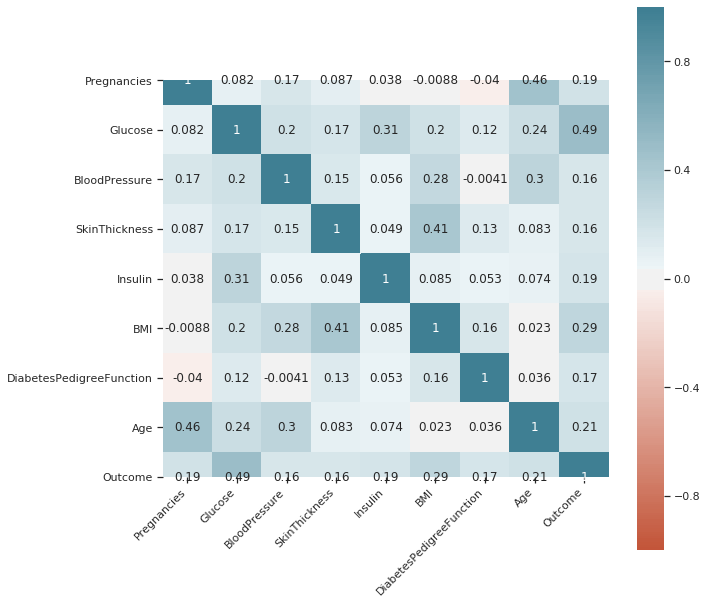

In [896]:
#create heat map
corr = dataset.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#BMI-SkinThickness :0.51
#Glucose-Outcome : 0.49
#Age-Pregnancies : 0.46

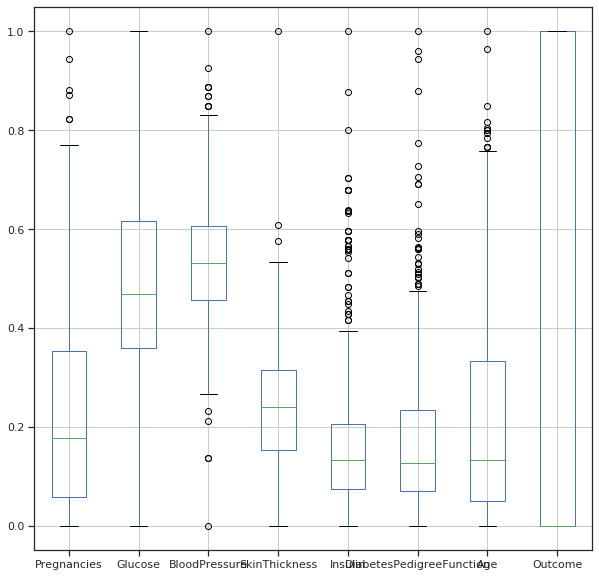

In [897]:
#creating box plot
plt.figure(figsize=(10,10))
boxplot = dataset.boxplot(column=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age','Outcome'])

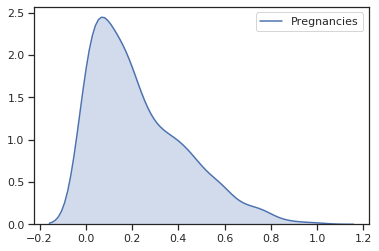

In [898]:
sns.kdeplot(dataset['Pregnancies'], shade=True)

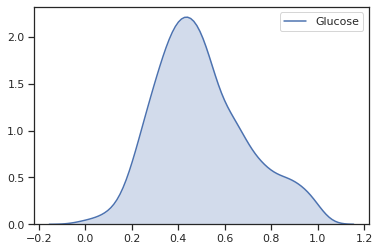

In [899]:
sns.kdeplot(dataset['Glucose'], shade=True)

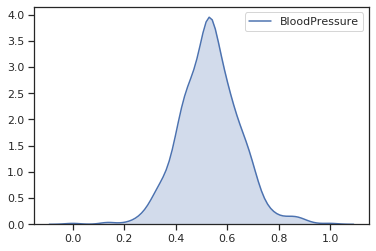

In [900]:
sns.kdeplot(dataset['BloodPressure'], shade=True)
#seems to be normally distributed

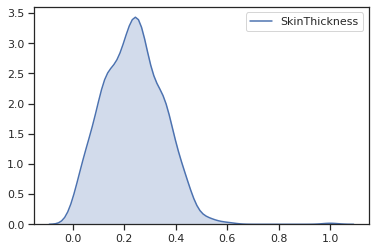

In [901]:
sns.kdeplot(dataset['SkinThickness'], shade=True)

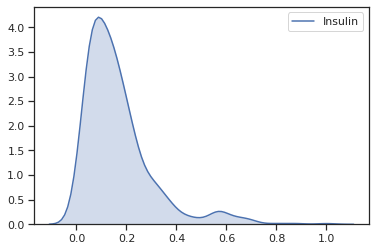

In [902]:
sns.kdeplot(dataset['Insulin'], shade=True)

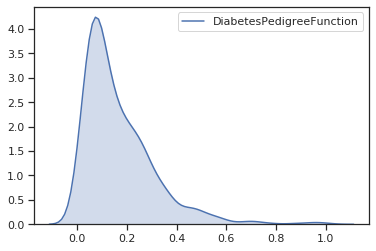

In [903]:
sns.kdeplot(dataset['DiabetesPedigreeFunction'], shade=True)

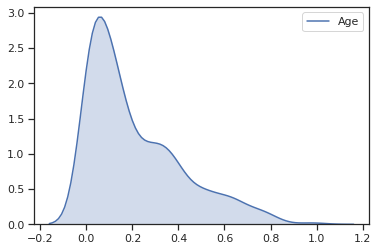

In [904]:
sns.kdeplot(dataset['Age'], shade=True)

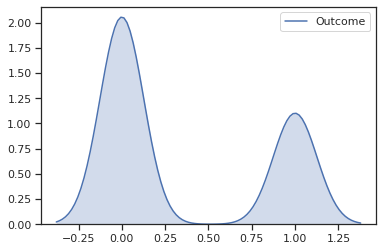

In [905]:
sns.kdeplot(dataset['Outcome'], shade=True)

In [906]:
#train and test data splitting 80:20
feature_list=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=dataset[feature_list]
y=dataset['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [907]:
#Model 1 LOGISTIC REGRESSION..
#train and test split already done before
# instantiate the model (using the default parameters)
logregressor = LogisticRegression(random_state=0)

# fit the model with data
logregressor.fit(X_train,y_train)

#
y_predicted=logregressor.predict(X_test)

# from sklearn import metrics
# confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
# confusion_matrix

In [908]:
# fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)

print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.8116883116883117
